In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style so charts look nice
sns.set_style('whitegrid')

# Load the data
df = pd.read_csv('Cost_of_Living_Index_2022.csv')

# Check if it worked
print("Data loaded! We have", len(df), "countries.")
df.head()

Data loaded! We have 139 countries.


,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


C:\Users\prajw\AppData\Local\Temp\ipykernel_728\2333115483.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='Cost of Living Index', y='Country', palette='viridis')


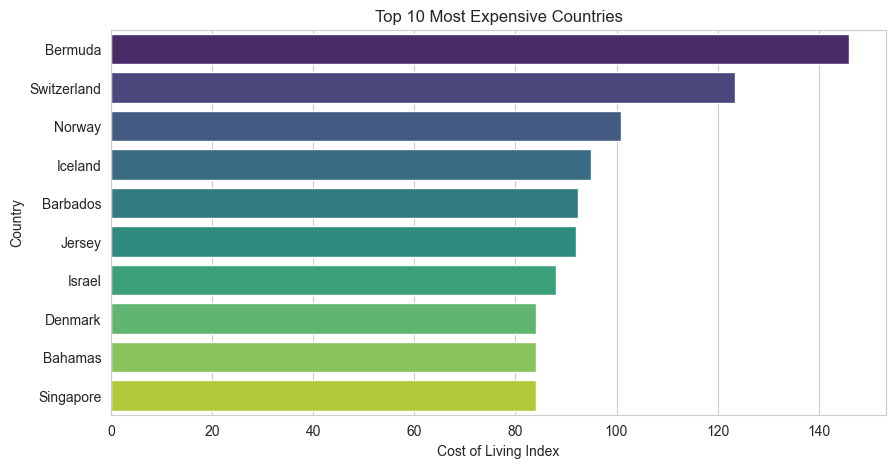

In [3]:
# Sort by Cost of Living and take the top 10
top_10 = df.sort_values(by='Cost of Living Index', ascending=False).head(10)

# Make the chart
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10, x='Cost of Living Index', y='Country', palette='viridis')
plt.title('Top 10 Most Expensive Countries')
plt.xlabel('Cost of Living Index')
plt.show()

In [4]:
# Filter: Cost < 50 AND Purchasing Power > 50
hidden_gems = df[(df['Cost of Living Index'] < 50) & (df['Local Purchasing Power Index'] > 50)]

# Sort by best purchasing power
hidden_gems = hidden_gems.sort_values(by='Local Purchasing Power Index', ascending=False)

print("--- HIDDEN GEM COUNTRIES ---")
print(hidden_gems[['Country', 'Cost of Living Index', 'Local Purchasing Power Index']].head(10))

--- HIDDEN GEM COUNTRIES ---
            Country  Cost of Living Index  Local Purchasing Power Index
91             Oman                 49.42                         84.24
67           Kuwait                 48.68                         78.57
113    South Africa                 42.09                         78.36
31   Czech Republic                 48.24                         66.47
18         Botswana                 40.17                         62.63
25            China                 41.77                         59.99
98           Poland                 38.95                         59.95
71        Lithuania                 45.65                         58.74
74         Malaysia                 37.02                         55.30
110        Slovakia                 44.68                         54.70


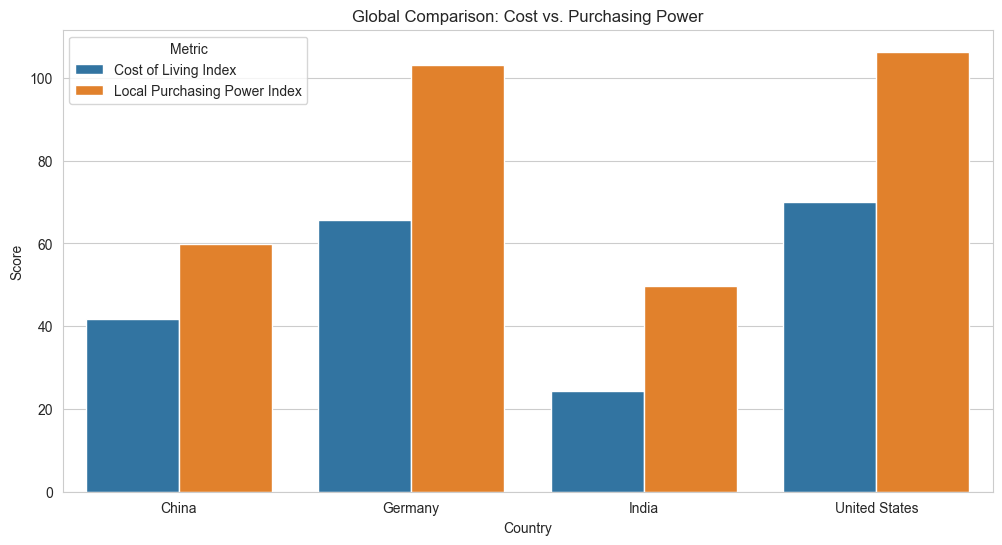

In [5]:
# Pick the countries you want to compare
target_countries = ['India', 'United States', 'China', 'Germany']
comparison = df[df['Country'].isin(target_countries)]

# Melt the data (reorganize it for the chart)
comparison_melted = comparison.melt(id_vars='Country', 
                                    value_vars=['Cost of Living Index', 'Local Purchasing Power Index'], 
                                    var_name='Metric', 
                                    value_name='Score')

# Plot it
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_melted, x='Country', y='Score', hue='Metric')
plt.title('Global Comparison: Cost vs. Purchasing Power')
plt.show()

In [6]:
import plotly.express as px

# Create an interactive map
fig = px.choropleth(df, 
                    locations="Country", 
                    locationmode='country names',
                    color="Cost of Living Index", 
                    hover_name="Country",
                    color_continuous_scale="Plasma",
                    title="World Cost of Living Map (Hover to see details!)")

# Show the map
fig.show()

C:\Users\prajw\AppData\Local\Temp\ipykernel_728\1293200595.py:4: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(df,


In [7]:
import plotly.graph_objects as go

# Define the things we want to compare
categories = ['Cost of Living Index', 'Rent Index', 'Groceries Index', 
              'Restaurant Price Index', 'Local Purchasing Power Index']

# Initialize the chart
fig = go.Figure()

# Add India's data
fig.add_trace(go.Scatterpolar(
      r=df[df['Country']=='India'][categories].values.flatten(),
      theta=categories,
      fill='toself',
      name='India'
))

# Add USA's data
fig.add_trace(go.Scatterpolar(
      r=df[df['Country']=='United States'][categories].values.flatten(),
      theta=categories,
      fill='toself',
      name='United States'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 120] # Scale from 0 to 120
    )),
  title="India vs USA: The Full Economic Profile"
)

fig.show()